### **Daegu Apartement**

### Contents

1. Business Problem Understanding
2. Data Understanding
3. Data Preprocessing
4. Modeling
5. Conclusion
6. Recommendation

****

### **Business Understanding**

**context**

Daegu adalah kota terbesar keempat di Korea Selatan dan merupakan pusat ekonomi dan budaya yang penting. Pasar apartemen di Daegu telah mengalami berbagai dinamika yang dipengaruhi oleh kondisi perekonomian, kebijakan pemerintah, dan perubahan demografi.
Harga apartemen di Daegu bervariasi tergantung pada lokasi, ukuran, dan fasilitas.


**Goal**

Tujuan dari proyek ini adalah untuk mengembangkan model prediktif untuk memperkirakan harga jual apartemen di Daegu berdasarkan berbagai fitur seperti lokasi, kedekatan dengan stasiun kereta bawah tanah, fasilitas terdekat, karakteristik apartemen, dan banyak lagi. Dengan membandingkan model regresi yang berbeda, yang bertujuan untuk mengidentifikasi metode yang paling akurat dan andal dalam memprediksi harga jual, yang dapat berguna bagi agen real estat, pembeli, penjual, dan investor.

**Metric Evaluation**

Evaluasi metrik yang akan digunakan adalah RMSE, MAE, dan MSE, di mana RMSE adalah nilai rataan akar kuadrat dari error, MAE adalah rataan nilai absolut dari error, sedangkan MAPE adalah rataan persentase error yang dihasilkan oleh model regresi. Semakin kecil nilai RMSE, MAE, dan MAPE yang dihasilkan, berarti model semakin akurat dalam memprediksi harga sewa sesuai dengan limitasi fitur yang digunakan. 

Selain itu, kita juga bisa menggunakan nilai R-squared atau adj. R-squared jika model yang nanti terpilih sebagai final model adalah model linear. Nilai R-squared digunakan untuk mengetahui seberapa baik model dapat merepresentasikan varians keseluruhan data. Semakin mendekati 1, maka semakin fit pula modelnya terhadap data observasi. Namun, metrik ini tidak valid untuk model non-linear.

### **Data Understanding**

- Dataset yang akan digunakan merupakan data listing Apartemen di Kota Daegu Korea Selatan.

**Attribute Information**

HallwayType: Jenis lorong (misalnya, teras, campuran).

TimeToSubway: Waktu yang dibutuhkan untuk mencapai stasiun kereta bawah tanah terdekat (misalnya, 0-5 menit, 10-15 menit).
SubwayStation: Stasiun kereta bawah tanah terdekat.

N_FacilitiesNearBy(ETC): Jumlah fasilitas terdekat (Lainnya).

N_FacilitiesNearBy(PublicOffice): Jumlah kantor publik terdekat.

N_SchoolNearBy(University): Jumlah universitas terdekat.

N_Parkinglot(Basement): Jumlah tempat parkir (di basement).

YearBuilt: Tahun dibangun.

N_FacilitiesInApt: Jumlah fasilitas dalam apartemen.

Size(sqf): Ukuran apartemen dalam kaki persegi.

SalePrice: Harga jual.



In [68]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import normaltest, chi2_contingency, mannwhitneyu, ttest_ind
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
import warnings
warnings.filterwarnings('ignore')

In [21]:
df = pd.read_csv('data_daegu_apartment.csv')

In [22]:
df.head()

,HallwayType,TimeToSubway,SubwayStation,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
0,terraced,0-5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,1270.0,2007,10,1387,346017
1,terraced,10min~15min,Kyungbuk_uni_hospital,1.0,5.0,1.0,0.0,1986,4,914,150442
2,mixed,15min~20min,Chil-sung-market,1.0,7.0,3.0,56.0,1997,5,558,61946
3,mixed,5min~10min,Bangoge,5.0,5.0,4.0,798.0,2005,7,914,165486
4,terraced,0-5min,Sin-nam,0.0,1.0,2.0,536.0,2006,5,1743,311504


#### **Exploratory Data Analysis**

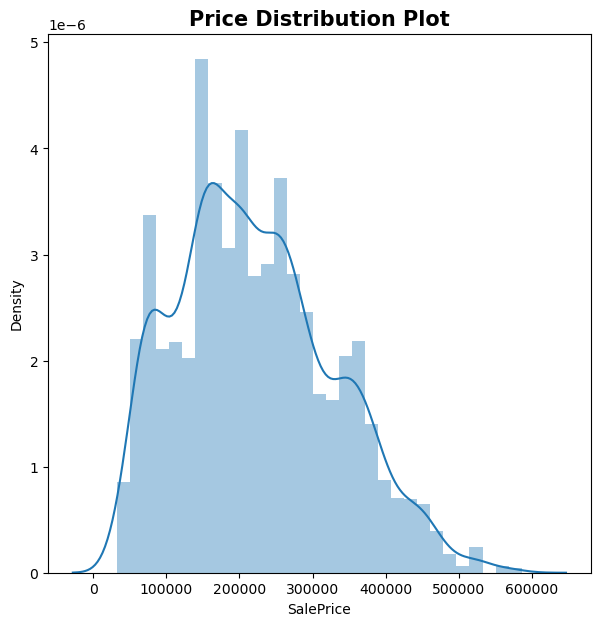

In [119]:
# Plot distribusi fitur 'price'
plt.figure(figsize=(7, 7))
sns.distplot(df['SalePrice'])
plt.title('Price Distribution Plot', size=15, weight='bold');

### **Data Preprocessing**

Pada tahap ini, kita akan melakukan cleaning pada data yang nantinya data yang sudah dibersihkan akan kita gunakan untuk proses analisis selanjutnya.
- Drop fitur yang tidak memiliki relevansi terhadap permasalahan yang sedang dihadapi.
- Melakukan pengecekan dan handling terhadap missing value jika ada. Bisa dengan cara mennghapus fiturnya jika memang tidak dibutuhkan atau bisa juga dengan mengimputasi dengan nilai yang paling masuk akal berdasarkan kasusnya.

In [38]:
#Cek Info dataset
print (f' Jumlah baris dalam data ini adalah {df.shape}')
df.info()

 Jumlah baris dalam data ini adalah (4123, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4123 entries, 0 to 4122
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   HallwayType                       4123 non-null   int64  
 1   TimeToSubway                      4123 non-null   int64  
 2   SubwayStation                     4123 non-null   int64  
 3   N_FacilitiesNearBy(ETC)           4123 non-null   float64
 4   N_FacilitiesNearBy(PublicOffice)  4123 non-null   float64
 5   N_SchoolNearBy(University)        4123 non-null   float64
 6   N_Parkinglot(Basement)            4123 non-null   float64
 7   YearBuilt                         4123 non-null   int64  
 8   N_FacilitiesInApt                 4123 non-null   int64  
 9   Size(sqf)                         4123 non-null   int64  
 10  SalePrice                         4123 non-null   int64  
dtypes: float64(4), int64(7

In [41]:
# Cek info lebih detail untuk setiap fitur
listItem = []

for col in df.columns:
    listItem.append([col, df[col].dtype, df[col].isna().sum(), round((df[col].isna().sum()/len(df[col]))*100, 2),
                    df[col].nunique(), list(df[col].drop_duplicates().sample(2).values)]);

df_desc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
df_desc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,HallwayType,int64,0,0.0,3,"[2, 0]"
1,TimeToSubway,int64,0,0.0,5,"[3, 4]"
2,SubwayStation,int64,0,0.0,8,"[2, 7]"
3,N_FacilitiesNearBy(ETC),float64,0,0.0,4,"[5.0, 0.0]"
4,N_FacilitiesNearBy(PublicOffice),float64,0,0.0,8,"[7.0, 0.0]"
5,N_SchoolNearBy(University),float64,0,0.0,6,"[2.0, 5.0]"
6,N_Parkinglot(Basement),float64,0,0.0,20,"[1174.0, 184.0]"
7,YearBuilt,int64,0,0.0,16,"[1978, 2009]"
8,N_FacilitiesInApt,int64,0,0.0,9,"[10, 8]"
9,Size(sqf),int64,0,0.0,89,"[1192, 163]"


Dari info dataset di atas, tidak terdapat data yang kosong pada beberapa fitur atau kolom.

In [45]:
#cek missing value
df.isnull().sum()

HallwayType                         0
TimeToSubway                        0
SubwayStation                       0
N_FacilitiesNearBy(ETC)             0
N_FacilitiesNearBy(PublicOffice)    0
N_SchoolNearBy(University)          0
N_Parkinglot(Basement)              0
YearBuilt                           0
N_FacilitiesInApt                   0
Size(sqf)                           0
SalePrice                           0
dtype: int64

In [8]:
df[df.duplicated()]

,HallwayType,TimeToSubway,SubwayStation,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
55,terraced,0-5min,Kyungbuk_uni_hospital,0.0,5.0,3.0,930.0,2013,7,910,263345
56,terraced,0-5min,Banwoldang,0.0,0.0,0.0,203.0,2014,10,914,371681
122,terraced,0-5min,Kyungbuk_uni_hospital,0.0,5.0,3.0,930.0,2013,7,644,149274
127,terraced,0-5min,Banwoldang,0.0,2.0,2.0,524.0,2007,4,1394,256637
133,mixed,15min~20min,Myung-duk,5.0,6.0,5.0,536.0,1993,4,644,168141
...,...,...,...,...,...,...,...,...,...,...,...
4113,terraced,5min~10min,Daegu,0.0,3.0,2.0,400.0,2015,7,644,300884
4114,corridor,10min~15min,Myung-duk,5.0,7.0,5.0,0.0,1992,3,355,86725
4115,mixed,15min~20min,Myung-duk,5.0,6.0,5.0,536.0,1993,4,1761,168141
4120,mixed,15min~20min,Myung-duk,5.0,6.0,5.0,536.0,1993,4,1761,168141


Data tidak terdapat data yang duplikat

In [49]:
# Cek deskriptif statistik fitur numerikal
num_features = [feature for feature in df.columns if ((df[feature].dtypes != 'object'))]
df[num_features].describe()

,HallwayType,TimeToSubway,SubwayStation,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
count,4123.000000,4123.000000,4123.000000,4123.000000,4123.000000,4123.000000,4123.000000,4123.000000,4123.000000,4123.000000,4123.000000
mean,1.500606,1.185059,3.767160,1.930876,4.135338,2.746301,568.979141,2002.999757,5.817851,954.630851,221767.926995
std,0.689343,1.314994,2.115794,2.198832,1.802640,1.496610,410.372742,8.905768,2.340507,383.805648,106739.839945
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1978.000000,1.000000,135.000000,32743.000000
25%,1.000000,0.000000,1.500000,0.000000,3.000000,2.000000,184.000000,1993.000000,4.000000,644.000000,144752.000000
50%,2.000000,1.000000,4.000000,1.000000,5.000000,2.000000,536.000000,2006.000000,5.000000,910.000000,209734.000000
75%,2.000000,2.000000,5.000000,5.000000,5.000000,4.000000,798.000000,2008.000000,7.000000,1149.000000,291150.000000
max,2.000000,4.000000,7.000000,5.000000,7.000000,5.000000,1321.000000,2015.000000,10.000000,2337.000000,585840.000000


In [51]:
# Cek harga sewa yang bernilai 0
df[df['SalePrice'] == 0]['SalePrice'].count()

0

**Data Correlation**

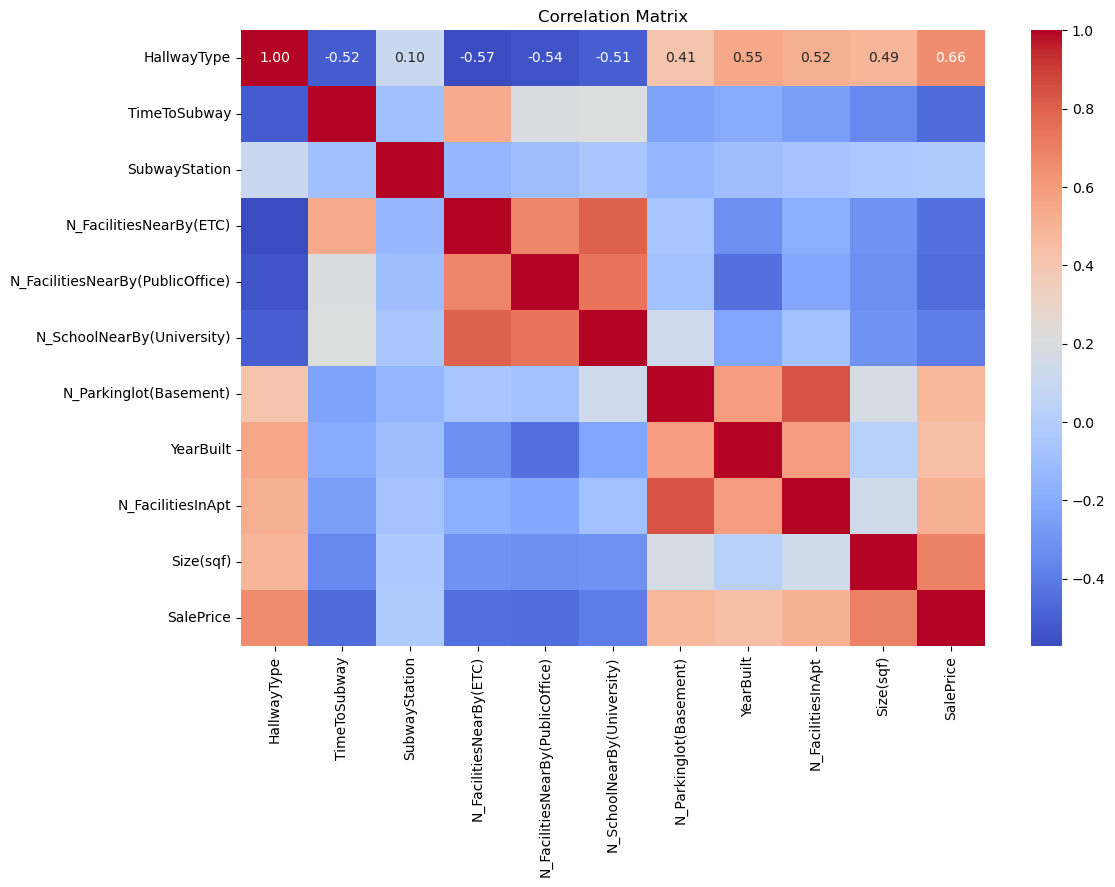

In [36]:
for feature in categorical_features:
    le = LabelEncoder()
    df[feature] = le.fit_transform(df[feature])
    label_encoders[feature] = le

# Uji Korelasi
corr_matrix = df.corr()

# Plotting the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


korelasi positif yang paling kuat ditunjukan oleh SalePrice dengan HallwayType

In [53]:
# Cek deskriptif statistik kolom price
df['SalePrice'].describe()

count      4123.000000
mean     221767.926995
std      106739.839945
min       32743.000000
25%      144752.000000
50%      209734.000000
75%      291150.000000
max      585840.000000
Name: SalePrice, dtype: float64

In [58]:
# Uji Statistik - Uji t
# Membandingkan rata-rata harga jual berdasarkan Hallway type
group1 = df[df['HallwayType'] == 0]['SalePrice']
group2 = df[df['HallwayType'] == 1]['SalePrice']

t_stat, p_val = stats.ttest_ind(group1, group2)

t_stat, p_val

(-21.532184478351038, 1.813289184392284e-90)

### Modelling

In [99]:
# Import library untuk modeling

from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV, KFold

import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.compose import TransformedTargetRegressor

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

In [100]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [101]:
#Encoding categorical features
label_encoders = {}
categorical_features = ['HallwayType', 'TimeToSubway', 'SubwayStation']

for feature in categorical_features:
    le = LabelEncoder()
    df[feature] = le.fit_transform(df[feature])
    label_encoders[feature] = le

#Memeriksa hasil encoding
df.head()

,HallwayType,TimeToSubway,SubwayStation,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
0,2,0,4,0.0,3.0,2.0,1270.0,2007,10,1387,346017
1,2,1,4,1.0,5.0,1.0,0.0,1986,4,914,150442
2,1,2,2,1.0,7.0,3.0,56.0,1997,5,558,61946
3,1,3,0,5.0,5.0,4.0,798.0,2005,7,914,165486
4,2,0,6,0.0,1.0,2.0,536.0,2006,5,1743,311504


In [108]:
# Memisahkan fitur dan target
X = df.drop('SalePrice', axis=1)
y = df['SalePrice']

# Membagi data menjadi data latih dan data uji (80:20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3298, 10), (825, 10), (3298,), (825,))

In [109]:
y_train_log = np.log1p(y_train)  # log1p is used to avoid log(0) issues
y_test_log = np.log1p(y_test)

In [111]:
# inisialisasi pipeline tiap model
pipelines = {
    "Linear Regression": Pipeline([
        ('scaler', StandardScaler()),
        ('model', LinearRegression())
    ]),
    "Random Forest Regressor": Pipeline([
        ('scaler', StandardScaler()),
        ('model', RandomForestRegressor(random_state=42))
    ]),
    "Gradient Boosting Regressor": Pipeline([
        ('scaler', StandardScaler()),
        ('model', GradientBoostingRegressor(random_state=42))
    ])
}

# Evaluasi Model
results = {}
for model_name, pipeline in pipelines.items():
    pipeline.fit(X_train, y_train_log) 
    y_pred_log = pipeline.predict(X_test)
    y_pred = np.expm1(y_pred_log) 
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[model_name] = {
        "MSE": mse,
        "RMSE": rmse,
        "MAE": mae,
        "R²": r2
    }

# Convert results to DataFrame
results_df = pd.DataFrame(results).T
print(results_df)

                                      MSE          RMSE           MAE  \
Linear Regression            3.039727e+09  55133.723085  44631.804202   
Random Forest Regressor      1.689657e+09  41105.437427  31542.139354   
Gradient Boosting Regressor  1.704661e+09  41287.546413  31844.347802   

                                   R²  
Linear Regression            0.718133  
Random Forest Regressor      0.843322  
Gradient Boosting Regressor  0.841931  


In [112]:
# Identify the two best models based on R²
best_models = results_df.nlargest(2, 'R²')
print("Best Models based on R²:")
print(best_models)

# Predict on the test set using the best two models
best_model_names = best_models.index
predictions = {}
for model_name in best_model_names:
    pipeline = pipelines[model_name]
    y_pred_log = pipeline.predict(X_test)
    y_pred = np.expm1(y_pred_log)  # Inverse transform the predictions
    predictions[model_name] = y_pred

# Display predictions for the two best models
predictions_df = pd.DataFrame(predictions)
print("\nPredictions on the test set:")
print(predictions_df.head())

Best Models based on R²:
                                      MSE          RMSE           MAE  \
Random Forest Regressor      1.689657e+09  41105.437427  31542.139354   
Gradient Boosting Regressor  1.704661e+09  41287.546413  31844.347802   

                                   R²  
Random Forest Regressor      0.843322  
Gradient Boosting Regressor  0.841931  

Predictions on the test set:
   Random Forest Regressor  Gradient Boosting Regressor
0            292220.867488                284291.397100
1            169003.328355                165721.689592
2             77253.688329                 84323.752251
3            409539.883065                412510.979805
4            194642.919196                192302.647780


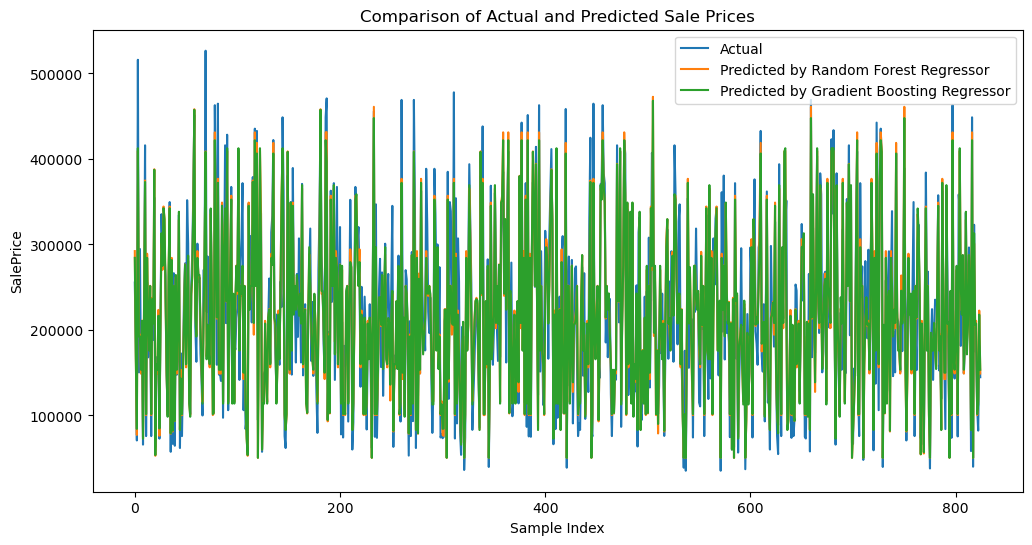

In [113]:
# Visualizing the results
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label='Actual')
for model_name in best_model_names:
    plt.plot(predictions[model_name], label=f'Predicted by {model_name}')
plt.legend()
plt.xlabel('Sample Index')
plt.ylabel('SalePrice')
plt.title('Comparison of Actual and Predicted Sale Prices')
plt.show()

In [115]:
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False]
}

In [120]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

print("Best parameters found: ", grid_search.best_params_)

Fitting 5 folds for each of 1620 candidates, totalling 8100 fits
Best parameters found:  {'bootstrap': False, 'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}


In [121]:
rf = RandomForestRegressor()
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_grid, n_iter=100, cv=5, n_jobs=-1, verbose=2, random_state=42)
random_search.fit(X_train, y_train)

print("Best parameters found: ", random_search.best_params_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best parameters found:  {'n_estimators': 300, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 30, 'bootstrap': False}


### Conclusion

Berdasarkan pemodelan yang sudah dilakukan, fitur HallwayType', 'TimeToSubway', 'SubwayStation menjadi fitur yang berpengaruh terhadap 'price'.

Pada dataset ini Metrik evaluasi yang digunakan pada model adalah nilai MSE, RMSE, MAE dan R².

Random Forest Regressor memiliki kinerja yang sedikit lebih baik dibandingkan dengan Gradient Boosting Regressor dalam hal R², MSE, RMSE, dan MAE. Ini menunjukkan bahwa Random Forest Regressor lebih baik dalam memprediksi harga apartemen dengan kesalahan yang lebih kecil dan fit yang lebih baik terhadap data.

Dengan R² sekitar 0.84, model dapat menjelaskan sekitar 84% variansi dalam harga apartemen. Ini adalah indikasi bahwa model cukup baik dalam menangkap pola dalam data harga apartemen.
MSE, RMSE, dan MAE yang lebih rendah pada Random Forest menunjukkan bahwa model ini memberikan prediksi harga yang lebih akurat dan lebih konsisten.


### Recommendations

Dapat dipertimbangkan untuk menambahkan fitur tambahan yang mungkin relevan, seperti tren ekonomi lokal, tingkat kejahatan, atau aksesibilitas transportasi. Fitur-fitur ini dapat meningkatkan akurasi model dan memberikan wawasan yang lebih dalam.

